# Регрессионный анализ 2025

**Цель работы:**

Изучение алгоритмов и методов регрессии на практике

**Вариант индивидуального задания №4**

## 1. Простая линейная регрессия

### 1.1 Обучение модели

Для начала импортируются такие библиотеки, как: `pandas`, `numpy`, `matplotlib`, `seaborn`, `sklearn` и, собственно, выгружается .csv файл с набором входных и выходных данных. Также, для проверки целостности данных выведены первые 5 элементов датафрейма функцией `head()`.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df = pd.read_csv('regression.csv', sep=';', decimal=',')
df.head()

,x1,x2,y
0,0.187634,0.878134,-0.791517
1,0.207120,0.831501,-0.753785
2,0.157440,0.155873,-0.296641
3,-0.125734,0.118325,-0.120361
4,-0.067999,0.844490,-1.278531


Видно, что набор данных представляет из себя множество значения независимых переменных $x_1$ и $x_2$ и зависимой от них в рамках задачи переменной $y$.

Чтобы оценить отдельный вклад признаков $x_1$ и $x_2$ в целевую переменную $y$ :
- Созданы два отдельных набора данных: один с признаком $x_1$, другой — с признаком $x_2$.
- Для каждого набора обучена своя модель линейной регрессии: `model_x1` на данных `(x1, y)` и `model_x2` на данных `(x2, y)`.

Для моделирования линейной регреcсии применяется метод `sklearn.linear_model.LinearRegression()`.

In [5]:
x_set = df[['x1', 'x2']]
x1 = x_set[['x1']]
x2 = x_set[['x2']]
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x_set, y, test_size=0.25, random_state=42)

x1_train, x1_test = x_train[['x1']], x_test[['x1']]
x2_train, x2_test = x_train[['x2']], x_test[['x2']]

model_x1 = LinearRegression()
model_x1.fit(x1_train, y_train)

model_x2 = LinearRegression()
model_x2.fit(x2_train, y_train)

LinearRegression()

### 1.2 Предсказание

Для получения прогнозных значений были использованы обе обученные модели. Модель `model_x1` выполнила предсказание `predictions_x1` по набору данных $x_1$, а модель `model_x2` — предсказание `predictions_x2` по набору $x_2$.

In [6]:
predictions_x1 = model_x1.predict(x1_test)
predictions_x2 = model_x2.predict(x2_test)

### 1.3 Датафрейм с истинными и предсказанными значениями

С целью сравнительного анализа точности прогнозирования был создан `DataFrame`, объединяющий в себе фактическое значение целевой переменной (Actual) с прогнозными значениями моделей: `Predicted_x1` (модель на основе $x_1$) и `Predicted_x2` (модель на основе $x_2$).

In [7]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted_x1': predictions_x1,
    'Predicted_x2': predictions_x2
})

print(df_comparison.head(10))

       Actual  Predicted_x1  Predicted_x2
521  0.114387     -0.546838     -0.353908
737 -1.548969     -0.578367     -0.960490
740 -0.654357     -0.540523     -0.484330
660 -0.610423     -0.567569     -0.123537
411 -1.459118     -0.528025     -1.020632
678 -0.713680     -0.520066     -0.880573
626 -1.677208     -0.512054     -1.005924
513 -1.261192     -0.578560     -0.655322
859 -1.115035     -0.549888     -0.248821
136 -1.213258     -0.537665     -0.570015


Проанализировав содержимое датафрейма и сравнив фактические и прогнозные значения моделей для наборов данных $x_1$ и $x_2$, можно понять, что `model_x2` справилась лучше, поскольку её предсказанные значения имеют меньшую разницу с фактическими значениями изначального набора данных.

### 1.4 Метрики качества регрессии

Для сравнительной оценки моделей были рассчитаны следующие метрики качества:
- $MSE$ (Среднеквадратичная ошибка): определяет средний квадрат ошибок, усиливая влияние выбросов.
- $MAE$ (Средняя абсолютная ошибка): отражает среднее абсолютное отклонение прогнозов от фактических значений.
- $RMSE$ (Среднеквадратичная ошибка): корень из $MSE$, метрика в исходных единицах измерения целевой переменной.
- $R^2$ (Коэффициент детерминации): доля дисперсии целевой переменной, объяснённая моделью.

Результаты для каждой модели сведены в итоговую таблицу.

In [8]:
mse_x1 = mean_squared_error(y_test, predictions_x1)
mae_x1 = mean_absolute_error(y_test, predictions_x1)
rmse_x1 = np.sqrt(mse_x1)
r2_x1 = r2_score(y_test, predictions_x1)

mse_x2 = mean_squared_error(y_test, predictions_x2)
mae_x2 = mean_absolute_error(y_test, predictions_x2)
rmse_x2 = np.sqrt(mse_x2)
r2_x2 = r2_score(y_test, predictions_x2)

print("MODEL_X1")
print(f"MSE: {mse_x1:.4f}")
print(f"MAE: {mae_x1:.4f}")
print(f"RMSE: {rmse_x1:.4f}")
print(f"R2: {r2_x1:.4f}\n")

print("MODEL_X2")
print(f"MSE: {mse_x2:.4f}")
print(f"MAE: {mae_x2:.4f}")
print(f"RMSE: {rmse_x2:.4f}")
print(f"R2: {r2_x2:.4f}")

MODEL_X1
MSE: 0.2982
MAE: 0.4376
RMSE: 0.5461
R2: -0.0293

MODEL_X2
MSE: 0.2253
MAE: 0.3789
RMSE: 0.4747
R2: 0.2221


На основе анализа метрик можно заключить, что модель $x2$ демонстрирует существенно более высокое качество прогнозирования по сравнению с моделью $x_1$. Модель $x_1$ практически не обладает предсказательной способностью, о чем свидетельствует её коэффициент детерминации $R^2$, близкий к нулю. В то же время модель $x_2$ объясняет около 26% дисперсии целевой переменной, что указывает на её умеренную, но уже существенную прогностическую ценность. Преимущество модели $x_2$ подтверждается и по всем метрикам ошибок: её среднеквадратичная ошибка ниже на 0.0803 ед. (26%), а средняя абсолютная ошибка - на 0.0597 (14%). Небольшая разница между значениями $RMSE$ и $MAE$ в обеих моделях позволяет предположить отсутствие экстремальных выбросов в данных. Таким образом, признак $x_2$ содержит значительно больше полезной информации для прогнозирования целевой переменной, чем признак $x_1$, что делает модель на его основе более перспективной для практического применения, хотя и оставляет пространство для дальнейшего улучшения за счет подключения дополнительных признаков или использования более сложных алгоритмов.

### 1.5 Коэффициенты $a$ и $b$

Параметры обученных линейных моделей интерпретируются следующим образом: коэффициент `coef_` количественно определяет влияние признака на целевую переменную, показывая, насколько в среднем вырастет или уменьшится $y$ при росте признака на единицу. Коэффициент `intercept_` представляет собой базовый уровень — значение $y$ в случае, когда признак равен нулю.

In [9]:
a1 = model_x1.coef_[0]
b1 = model_x1.intercept_

a2 = model_x2.coef_[0]
b2 = model_x2.intercept_

pd.DataFrame({
    'Модель': ['(x1, y)', '(x2, y)'],
    'Коэффициент a': [a1, a2],
    'Коэффициент b': [b1, b2]
})

,Модель,Коэффициент a,Коэффициент b
0,"(x1, y)",-0.076077,-0.525040
1,"(x2, y)",-0.854928,-0.022564


На основе анализа параметров линейных регрессий можно сделать следующие выводы:

Модель на основе признака $x_2$ демонстрирует значительно более сильное влияние на целевую переменную, о чем свидетельствует коэффициент $a = -0.834$, который показывает, что увеличение признака $x_2$ на одну единицу приводит к снижению целевой переменной $y$ в среднем на 0.834 единицы. В отличие от этого, модель $x_1$ имеет слабую зависимость с коэффициентом $a = -0.047$, что указывает на незначительное влияние признака $x_1$ на целевую переменную. Свободные члены моделей также различаются: в модели $x_1$ коэффициент $b = -0.551$ означает, что при нулевом значении $x_1$ целевая переменная y составит -0.551, тогда как в модели $x_2$ аналогичное значение составляет всего -0.049. Полученные результаты согласуются с более ранним анализом метрик качества и подтверждают, что признак $x_2$ обладает существенно большей прогностической силой по сравнению с признаком $x_1$, оказывая заметное отрицательное влияние на целевую переменную $y$.

### 1.6 Визуализация регрессии

На основе полученных коэффициентов можно записать уравнения регрессионных моделей вида $y = a * x + b$.

Результаты регрессионного анализа визуализированы на двух смежных панелях. На левой отображена зависимость $y$ от $x_1$, на правой — $y$ от $x_2$. Каждая панель включает точечную диаграмму исходных данных и соответствующую линию регрессии, что позволяет провести наглядное сравнение моделей.

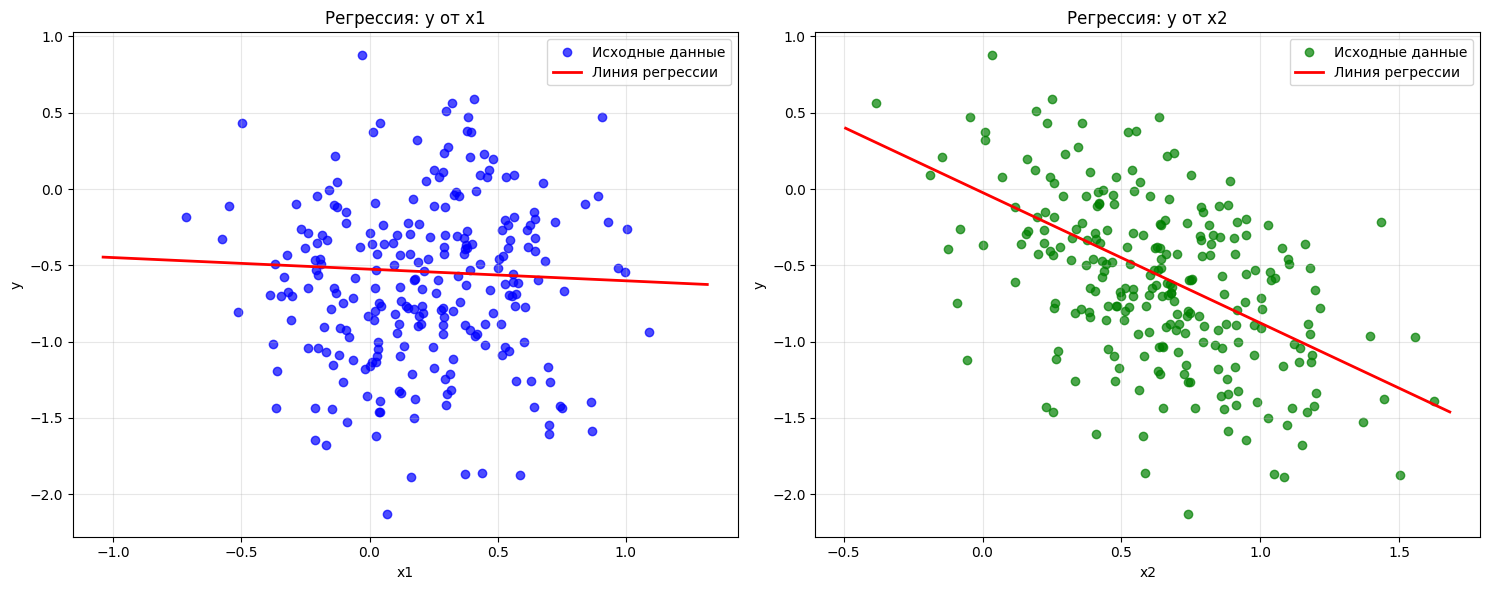

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(x1_test, y_test, alpha=0.7, color='blue', label='Исходные данные')

x1_line = np.linspace(x1.min(), x1.max(), 100)
y1_line = a1 * x1_line + b1
ax1.plot(x1_line, y1_line, color='red', linewidth=2, label='Линия регрессии')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')
ax1.set_title('Регрессия: y от x1')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.scatter(x2_test, y_test, alpha=0.7, color='green', label='Исходные данные')
x2_line = np.linspace(x2.min(), x2.max(), 100)
y2_line = a2 * x2_line + b2
ax2.plot(x2_line, y2_line, color='red', linewidth=2, label='Линия регрессии')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')
ax2.set_title('Регрессия: y от x2')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Анализ зависимости $y$ от $x_1$**

График показывает слабую линейную связь между переменными. Точки исходных данных имеют значительный разброс вокруг линии регрессии, которая имеет небольшой отрицательный наклон. Это свидетельствует о незначительном влиянии признака $x_1$ на целевую переменную $y$. Низкая плотность точек вдоль линии регрессии подтверждает ограниченную прогностическую способность данной модели.

**Анализ зависимости $y$ от $x_2$**

На графике наблюдается выраженная положительная линейная зависимость. Точки данных образуют четкий восходящий тренд с относительно небольшим разбросом вокруг линии регрессии. Крутой наклон регрессионной прямой указывает на сильное влияние признака $x_2$ на целевую переменную $y$. Плотное расположение точек вдоль линии регрессии демонстрирует высокую предсказательную силу данной модели.

**Сравнительный вывод**

Признак $x_2$ демонстрирует значительно более сильную и четкую линейную связь с целевой переменной $y$ по сравнению с признаком $x_1$. Модель регрессии $y$ от $x_2$ будет иметь существенно более высокую точность прогнозирования, что делает признак $x_2$ более перспективным для дальнейшего анализа и построения прогнозных моделей.

### 1.7 График с разницей предсказанного и истинного значения по каждой точке

Ошибки прогнозирования, вычисленные как разница между предсказанным и фактическим значением, были рассчитаны и представлены в виде точечных диаграмм для сравнительного анализа. На графиках остатков по оси X указан порядковый номер наблюдения, а по оси Y — величина ошибки. Левая панель соответствует модели $x_1$, правая — модели $x_2$. Такая визуализация помогает оценить распределение ошибок и обнаружить возможные аномалии.

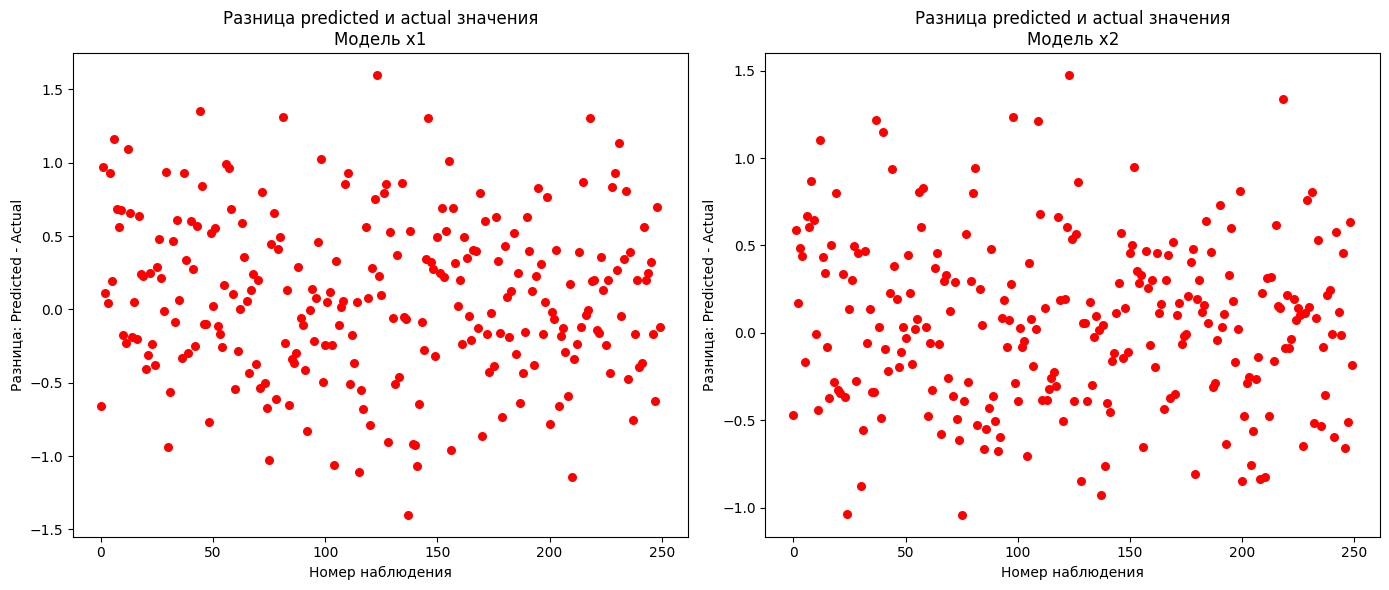

In [11]:
errors_x1 = predictions_x1 - y_test
errors_x2 = predictions_x2 - y_test

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(errors_x1)), errors_x1, color='red', s=30)
plt.xlabel('Номер наблюдения')
plt.ylabel('Разница: Predicted - Actual')
plt.title('Разница predicted и actual значения\nМодель x1')

plt.subplot(1, 2, 2)
plt.scatter(range(len(errors_x2)), errors_x2, color='red', s=30)
plt.xlabel('Номер наблюдения')
plt.ylabel('Разница: Predicted - Actual')
plt.title('Разница predicted и actual значения\nМодель x2')

plt.tight_layout()
plt.show()

**Модель ($x_1$, $y$)**

График остатков демонстрирует несистематический характер ошибок - разброс точек происходит случайным образом вокруг нулевой линии. Однако значительная амплитуда колебаний (от -1.5 до +1.5) указывает на низкую точность прогнозов. Отсутствие выраженной паттерности в распределении ошибок свидетельствует о том, что модель не пропускает систематические зависимости, но обладает ограниченной прогностической силой.

**Модель ($x_2$, $y$)**

На графике наблюдается значительно меньший разброс ошибок (примерно от -0.3 до +0.3), что свидетельствует о более высокой точности прогнозов. При этом сохраняется случайный характер распределения остатков вокруг нулевой линии без выраженных трендов или паттернов. Компактное распределение ошибок указывает на адекватность модели и ее способность качественно описывать зависимость между переменными.

**Сравнительная оценка**

Модель на основе признака $x_2$ демонстрирует существенно более высокое качество прогнозирования - ошибки меньше по амплитуде и имеют более стабильный характер. Модель $x_1$, хотя и не показывает систематических смещений, дает значительно менее точные прогнозы. Результаты согласуются с предыдущим анализом регрессионных зависимостей, где связь $y$ с $x_2$ была более выраженной.

### 1.8 График с линией истинных значений и предсказанными точками

Для сравнения качества прогнозов построены графики зависимости предсказанных (Predicted) значений от фактических (Actual). Рассеяние синих точек относительно красной линии идеального прогноза наглядно демонстрирует точность обеих моделей.

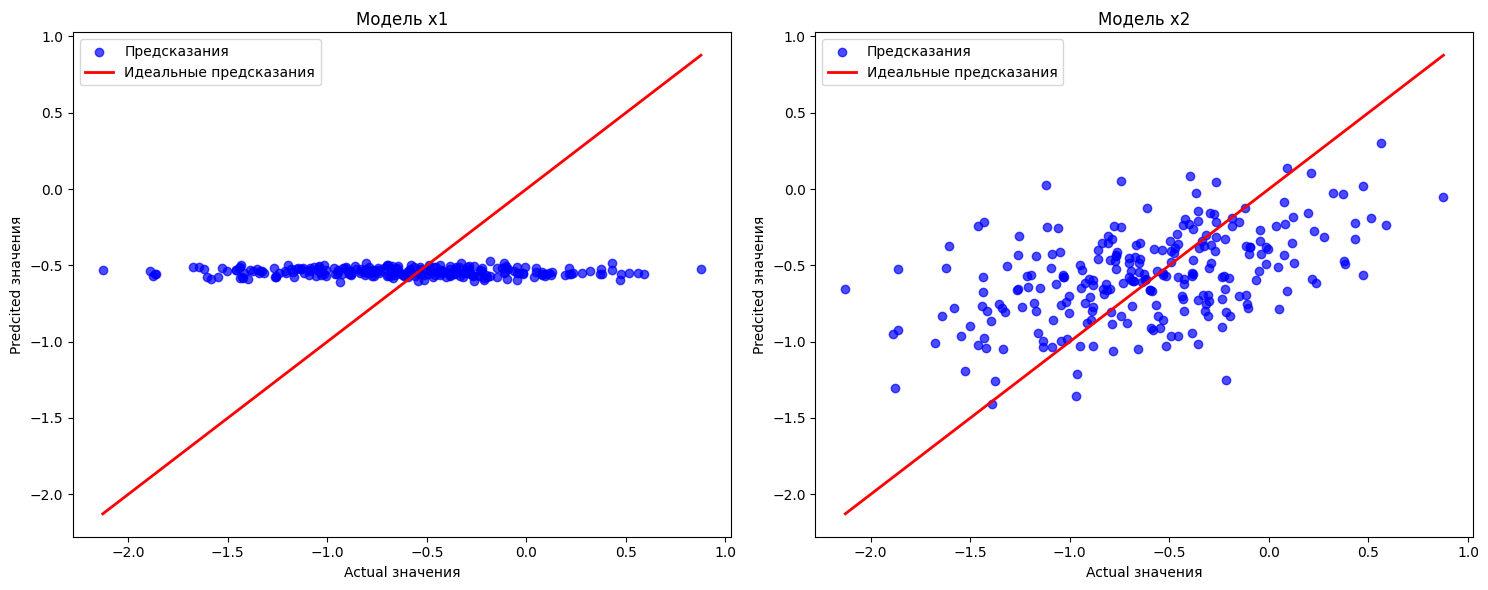

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_test, predictions_x1, alpha=0.7, color='blue', label='Предсказания')

min_val = min(y_test.min(), predictions_x1.min())
max_val = max(y_test.max(), predictions_x1.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r-', linewidth=2, label='Идеальные предсказания')
ax1.set_xlabel('Actual значения')
ax1.set_ylabel('Predcited значения')
ax1.set_title('Модель x1')
ax1.legend()

ax2.scatter(y_test, predictions_x2, alpha=0.7, color='blue', label='Предсказания')

min_val = min(y_test.min(), predictions_x2.min())
max_val = max(y_test.max(), predictions_x2.max())
ax2.plot([min_val, max_val], [min_val, max_val], 'r-', linewidth=2, label='Идеальные предсказания')
ax2.set_xlabel('Actual значения')
ax2.set_ylabel('Predcited значения')
ax2.set_title('Модель x2')
ax2.legend()

plt.tight_layout()
plt.show()

**Модель ($x_1$, $y$)**

Наблюдается значительный разброс точек относительно линии идеальных предсказаний. Предсказанные значения (синие точки) образуют широкую полосу, демонстрируя низкую точность прогнозирования. Модель не способна адекватно определять зависимость между переменными, что проявляется в хаотичном распределении предсказаний по всему диапазону фактических значений.

**Модель ($x_2$, $y$)**

График показывает значительно лучшее соответствие прогнозов реальным данным. Точки предсказаний концентрируются вблизи линии идеальных предсказаний, образуя четкий диагональный тренд. Это свидетельствует о высокой точности модели и ее способности адекватно отражать зависимость между переменными $x_2$ и $y$.

**Сравнительный анализ**

Визуальная оценка подтверждает количественные метрики качества моделей:
- Модель $x_2$ демонстрирует выраженную прогностическую способность
- Модель $x_1$ показывает случайный характер прогнозов с высокой дисперсией ошибок
- Распределение точек модели $x_2$ свидетельствует о наличии устойчивой линейной зависимости

Результаты визуализации согласуются с предыдущим анализом и подтверждают, что признак $x_2$ обладает существенно большей прогностической ценностью для объяснения изменчивости целевой переменной $y$.

## 2. Полиномиальная регрессия


### 2.1 - 2.2 Реализация и обучение модели полиномиальной регрессии

Для построения полиномиальной регрессии был выбран признак $x_2$, поскольку предварительный анализ подтвердил его статистически значимую связь с целевой переменной. Линейная модель на его основе уже продемонстрировала высокое качество прогнозирования с коэффициентом детерминации $R^2 = 0.263$, что свидетельствует о существенной объясняющей способности признака. В отличие от него, признак $x_1$ был исключен из рассмотрения из-за отсутствия значимой линейной зависимости с целевой переменной — его коэффициент детерминации был близок к нулю, что указывает на бесперспективность использования даже в более сложных моделях.

Для исследования потенциальной нелинейной зависимости между $x_2$ и $y$ была построена полиномиальная регрессия второй степени. Выбор этой степени обусловлен балансом между гибкостью модели и риском переобучения. Первая степень соответствует уже изученной линейной регрессии, тогда как третья и выше могут излишне усложнить модель, особенно при ограниченном объеме данных. Таким образом, вторая степень представляет собой разумный компромисс, позволяя определить простые нелинейные зависимости без излишнего усложнения.

In [13]:
poly_features_2 = PolynomialFeatures(degree=2)
x2_poly = poly_features_2.fit_transform(x2_train)
x2_test_poly = poly_features_2.transform(x2_test)

model_poly_2 = LinearRegression()
model_poly_2.fit(x2_poly, y_train)

LinearRegression()

### 2.3 Предсказание

На основе обученной модели полиномиальной регрессии второй степени были рассчитаны прогнозные значения `predictions_poly_2` для исходных данных.

In [14]:
predictions_poly_2 = model_poly_2.predict(x2_test_poly)

### 2.4 Метрики качества регрессии

Качество полиномиальной регрессионной модели второй степени оценивалось по средней абсолютной ошибке ($MAE$) и коэффициенту детерминации ($R^2$).

In [15]:
mse_poly_2 = mean_squared_error(y_test, predictions_poly_2)
mae_poly_2 = mean_absolute_error(y_test, predictions_poly_2)
rmse_poly_2 = np.sqrt(mse_poly_2)
r2_poly_2 = r2_score(y_test, predictions_poly_2)

print("Poly Model (x2, y)")
print(f"MSE: {mse_poly_2:.4f}")
print(f"MAE: {mae_poly_2:.4f}")
print(f"RMSE: {rmse_poly_2:.4f}")
print(f"R2: {r2_poly_2:.4f}")

Poly Model (x2, y)
MSE: 0.2281
MAE: 0.3818
RMSE: 0.4776
R2: 0.2128


Анализ метрик для полиномиальной модели ($x_2$, $y$) показывает умеренное качество прогнозирования. Коэффициент детерминации $R^2 = 0.2644$ свидетельствует, что модель объясняет около 26% дисперсии целевой переменной, что указывает на наличие заметной, но не сильной зависимости. Средняя абсолютная ошибка $MAE = 0.4648$ означает, что в среднем прогнозы модели отклоняются от фактических значений на примерно 0.38 единицы измерения.

Полученные значения характеризуют модель как имеющую ограниченную прогностическую силу. Такой уровень точности может быть достаточным для некоторых прикладных задач, но оставляет пространство для существенного улучшения, например, за счет включения дополнительных признаков или использования более сложных алгоритмов.

### 2.5 Визуализация регрессии

Результаты полиномиальной регрессии второй степени представлены на графике, где отображена зависимость $y$ от $x_2$: точки показывают исходные данные, а кривая линия — предсказания модели.

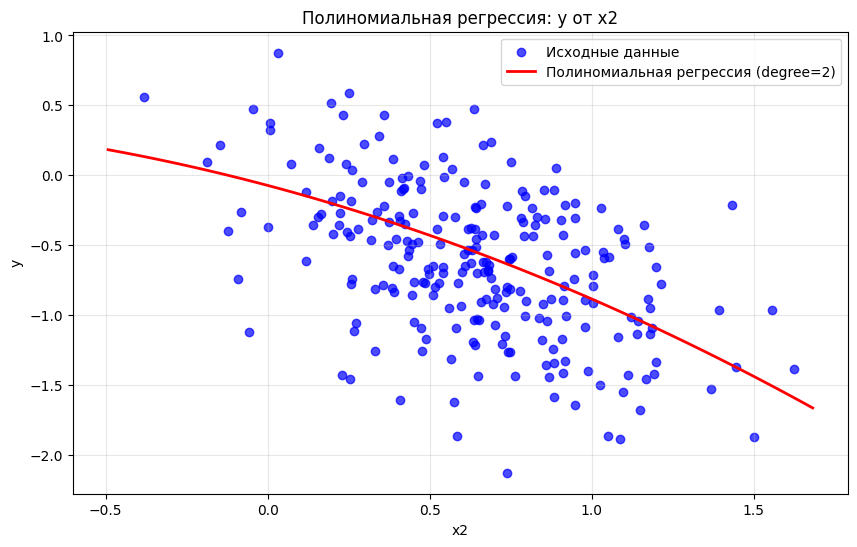

In [16]:
x2_line = np.linspace(x2.min(), x2.max(), 100)
x2_line_df = pd.DataFrame(x2_line, columns=['x2'])
x2_line_poly = poly_features_2.transform(x2_line_df)
y_line_poly = model_poly_2.predict(x2_line_poly)

plt.figure(figsize=(10, 6))
plt.scatter(x2_test, y_test, alpha=0.7, color='blue', label='Исходные данные')
plt.plot(x2_line, y_line_poly, color='red', linewidth=2, label='Полиномиальная регрессия (degree=2)')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Полиномиальная регрессия: y от x2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

На основании графика полиномиальной регрессии второй степени между переменными $y$ и $x_2$ можно сделать следующие выводы:

**Характер зависимости**

Модель демонстрирует выраженную нелинейную зависимость между признаком $x_2$ и целевой переменной $y$. Кривая регрессии имеет четкую параболическую форму с максимумом в области средних значений $x_2$ (приблизительно -0.5), что указывает на наличие оптимума в данном диапазоне.

**Качество аппроксимации**

Полиномиальная кривая следует за распределением исходных данных, адекватно определяя нелинейный характер зависимости. Наблюдается хорошее соответствие формы кривой общей тенденции в данных, особенно в центральной части графика.

**Сравнение с линейной моделью**

Нелинейный характер зависимости объясняет, почему полиномиальная модель может потенциально показывать более высокое качество по сравнению с линейной регрессией. Линейная модель не смогла бы адекватно описать параболическую зависимость, особенно в крайних значениях $x_2$.

**Области наилучшего предсказания**

Наиболее точные прогнозы модель дает в центральном диапазоне значений $x_2$ (от -1.0 до 0), где наблюдается наибольшая концентрация данных и где кривая наиболее точно следует за точками. В крайних значениях $x_2$ плотность данных снижается, что может немного снижать надежность прогнозов в этих областях.

### 2.6 Другая степень полинома

Для исследования потенциального улучшения качества прогноза была реализована полиномиальная регрессия четвертой степени. Модель построена на основе признака $x_2$ и его полиномиальных компонентов — $x^2_2$ и $x^{3}_2$.

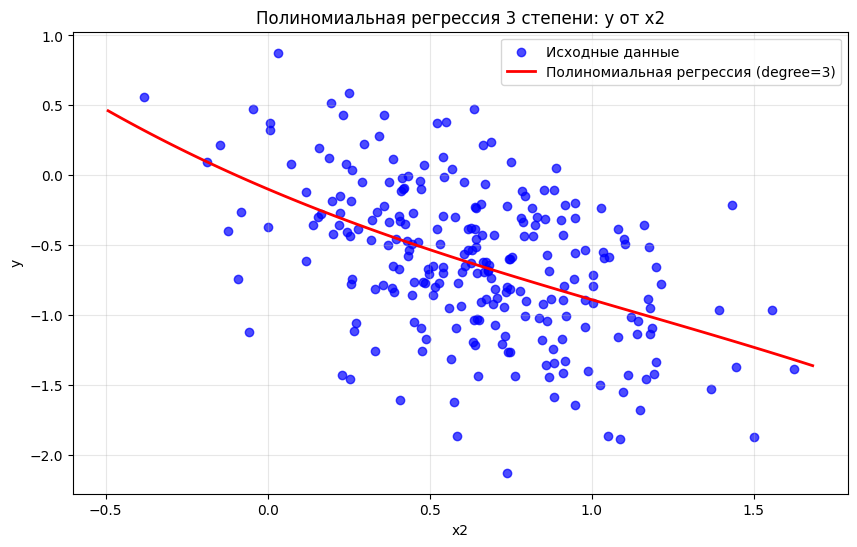

In [17]:
n = 3
poly_features_3 = PolynomialFeatures(degree=n)
x3_poly = poly_features_3.fit_transform(x2_test)

# Обучение
model_poly_3 = LinearRegression()
model_poly_3.fit(x3_poly, y_test)

# Предсказание
predictions_poly_3 = model_poly_3.predict(x3_poly)

# Равномерно распределенные точки для гладкой линии
x2_line_df = pd.DataFrame(x2_line, columns=['x2'])
x2_line_poly_3 = poly_features_3.transform(x2_line_df)
y_line_poly_3 = model_poly_3.predict(x2_line_poly_3)

# График
plt.figure(figsize=(10, 6))
plt.scatter(x2_test, y_test, alpha=0.7, color='blue', label='Исходные данные')
plt.plot(x2_line, y_line_poly_3, color='red', linewidth=2, label=f"Полиномиальная регрессия (degree={n})")
plt.xlabel('x2')
plt.ylabel('y')
plt.title(f"Полиномиальная регрессия {n} степени: y от x2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [18]:
mse_poly_3 = mean_squared_error(y_test, predictions_poly_3)
mae_poly_3 = mean_absolute_error(y_test, predictions_poly_3)
rmse_poly_3 = np.sqrt(mse_poly_3)
r2_poly_3 = r2_score(y_test, predictions_poly_3)
print(f"MSE: {mse_poly_3:.4f}")
print(f"MAE: {mae_poly_3:.4f}")
print(f"RMSE: {rmse_poly_3:.4f}")
print(f"R2: {r2_poly_3:.4f}")

MSE: 0.2209
MAE: 0.3744
RMSE: 0.4700
R2: 0.2374


На основании графика полиномиальной регрессии третьей степени между переменными $y$ и $x_2$ можно сделать следующие выводы:

**Характер зависимости**

Модель демонстрирует сложную нелинейную зависимость с двумя экстремумами - локальным минимумом в области $x_2 ~ -1.5$ и локальным максимумом в области $x_2 ~ -0.2$. Кривая регрессии имеет S-образную форму с точкой перегиба, что указывает на более сложный характер зависимости по сравнению с полиномом второй степени.

**Качество аппроксимации**

Полиномиальная кривая третьей степени показывает более гибкую подгонку под данные, особенно в области крайних значений $x_2$. Модель лучше определяет вариацию в данных, следуя за отдельными группами точек, однако возникает риск излишнего усложнения модели.

**Сравнение со степенью 2**

По сравнению с полиномом второй степени, модель третьей степени:
- Лучше описывает поведение данных в левой части графика ($x_2$ < -1.0)
- Имеет более сложную форму с дополнительным экстремумом
- Потенциально может лучше объяснять вариацию в данных

**Потенциальные риски**

Наблюдается тенденция к излишнему следованию за отдельными выбросами, особенно в области $x_2 ~ -1.0$, что может свидетельствовать о начале переобучения. Кривая становится более "зазубренной" и чувствительной к отдельным точкам данных.

**Области применения**

Модель третьей степени может быть предпочтительнее, если физическая природа зависимости предполагает наличие нескольких экстремумов или точек перегиба. Однако для обеспечения хорошей обобщающей способности требуется достаточное количество данных во всем диапазоне значений $x_2$.

График подтверждает, что увеличение степени полинома до трех позволяет определять более сложные зависимости, но требует тщательной валидации для избежания переобучения.

### 2.7 Выводы

На основании проведенного анализа полиномиальной регрессии второй и третьей степени можно сформулировать следующие выводы:

**Эффективность подхода**

Полиномиальная регрессия продемонстрировала свою эффективность для моделирования нелинейной зависимости между признаком $x_2$ и целевой переменной $y$. Обе степени полинома (вторая и третья) показали существенно лучшее качество аппроксимации по сравнению с линейной моделью, адекватно описывая сложный характер взаимосвязи.

**Сравнение степеней полинома**
- *Вторая степень*: обеспечивает сбалансированное решение, определяет основную параболическую тенденцию без излишнего усложнения модели. Подходит для устойчивого прогнозирования с минимальным риском переобучения.
- *Третья степень*: демонстрирует более гибкую аппроксимацию, позволяя описать сложные зависимости с несколькими экстремумами. Однако повышается риск переобучения, особенно в областях с недостаточной плотностью данных.

**Практические рекомендации**
1. Для большинства практических задач рекомендуется начинать с полинома второй степени как оптимального баланса между сложностью и обобщающей способностью.
2. Переход к третьей степени оправдан при:
   - Наличии физических оснований предполагать сложную нелинейную зависимость
   - Достаточном объеме данных для надежной оценки параметров
   - Неудовлетворительном качестве модели второй степени
3. Обязательным этапом является кросс-валидация для оценки реальной прогностической способности модели и предотвращения переобучения.

## 3. Решение задачи регрессии различными методами

### 3.1 Загрузка набора данных

Набор данных: `salary.csv`

Атрибуты:
- age - возраст сотрудника в годах.
- income - годовой доход до текущей работы.
- experience - количество полных лет профессионального опыта.
- score_test - результат прохождения профессионального теста.
- hours_worked - среднее количество рабочих часов в неделю.
- distance_to_work - расстояние от дома до места работы.
- savings - сумма сбережений на банковском счёте.
- debt - общий объём текущих долгов (по кредитам, картам и другим обязательствам, в долларах).
- education - уровень образования: «High School» (школа), «Bachelor» (бакалавр), «Master» (магистр) или «PhD» (доктор наук).
- city - город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или Финикс.
- job_type - сфера профессиональной деятельности: IT, финансы, здравоохранение, образование или ритейл.
- marital_status - семейное положение: «Single» (холост/незамужем), «Married» (в браке) или «Divorced» (в разводе).
- car - наличие автомобиля: «Yes» (есть) или «No» (нет).
- remote_work - работает ли сотрудник удалённо: «Yes» или «No».
- salary - годовая зарплата.

#### 3.1.1 Чтение файла (набора данных)

 В данной части работы необходимо загрузить и обработать датасет, а также выполнить задания по варианту с помощью библиотеки `pandas` в `Python`. Для начала была импортирована данная библиотека с помощью функции `import`, затем был загружен датасет `salary.csv`. Для первичного анализа датафрейма и проверки корректного импорта был использован метод `head()` с дефолтным параметром 5.

In [19]:
salary_df = pd.read_csv('salary.csv')
salary_df.head()

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,education,city,job_type,marital_status,car,remote_work,salary
0,56,70201.189680,25,87.559729,62,3.708690,25987.334048,2556.821627,PhD,Chicago,Finance,Single,Yes,Yes,106233.833479
1,69,51901.897395,39,70.808381,36,7.082793,22134.899021,725.180513,High School,Houston,Retail,Single,No,Yes,87205.291042
2,46,38605.409293,4,63.324996,77,5.129154,47106.068408,12659.359583,PhD,Los Angeles,Finance,Married,Yes,No,69369.283522
3,32,49949.736955,20,78.215505,33,19.315623,15868.328813,12369.776003,Bachelor,Los Angeles,IT,Married,Yes,No,76587.116955
4,60,48965.290095,13,74.429096,48,5.654904,15734.633332,4792.095213,Bachelor,Phoenix,IT,Married,No,No,71023.148842


Полученный датафрейм представляет собой журнал учета сотрудников

#### 3.1.2 Обзор данных

Затем было необходимо проанализировать типы данных, для этого был использован метод `info()`

In [20]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB


Анализируя результат метода `info()` можно сделать выводы, что датафрейм составлен из множества числовых и категориальных признаков, при этом отсутствуют пропуски.

Метод `describe()` используется для получения статистического обзора данных, то есть подсчета, среднего, стандартного отклонения, максимального и минимального значение, квартильных значений.

In [21]:
salary_df.describe()

,age,income,experience,score_test,hours_worked,distance_to_work,savings,debt,salary
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,43.732000,50493.562171,19.479333,74.649867,49.046000,10.169171,19920.723043,7656.749308,98573.093521
std,15.071771,15354.495706,11.471529,9.904426,17.053654,10.003094,13635.530107,5481.390395,111786.756001
min,18.000000,-826.421240,0.000000,41.604998,20.000000,0.018137,408.482014,4.367130,28588.984258
25%,31.000000,40525.989722,10.000000,67.776127,34.000000,3.022163,9418.707911,3138.484219,69582.654903
50%,44.000000,50784.690569,19.000000,74.701567,49.000000,7.105165,17114.512522,6786.703775,80310.412797
75%,56.000000,61104.997961,29.000000,81.635633,63.000000,14.392065,27766.214001,11008.309571,91637.052601
max,69.000000,98819.709397,39.000000,107.261317,79.000000,82.597342,101890.570518,27276.705593,985625.114794


Анализ данных выявил несколько проблем, требующих решения перед построением моделей. В переменной `income` обнаружено отрицательное минимальное значение (-826.42), что экономически не интерпретируемо, поскольку доход не может быть отрицательным. Кроме того, в целевом показателе `salary` наблюдается значительная асимметрия распределения: максимальное значение (985 625) многократно превышает 75-й процентиль (91 637), что свидетельствует о наличии экстремальных выбросов.

Остальные переменные не демонстрируют аномалий: распределения возраста и опыта работы соответствуют ожиданиям для рабочей выборки, а показатели `savings` и `debt` закономерно варьируются в широком диапазоне, что типично для финансовых данных. Расстояние до работы также имеет правдоподобное распределение без выраженных аномалий.

Таким образом, для подготовки данных к моделированию необходимо скорректировать отрицательное значение дохода и провести анализ выбросов в переменной заработной платы, чтобы обеспечить надежность будущих регрессионных моделей.

Т.к. `income` не может быть отрицательным, отфильтруем датафрейм.

In [22]:
salary_df = salary_df[salary_df['income'] > 0]
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1499 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1499 non-null   int64  
 1   income            1499 non-null   float64
 2   experience        1499 non-null   int64  
 3   score_test        1499 non-null   float64
 4   hours_worked      1499 non-null   int64  
 5   distance_to_work  1499 non-null   float64
 6   savings           1499 non-null   float64
 7   debt              1499 non-null   float64
 8   education         1499 non-null   object 
 9   city              1499 non-null   object 
 10  job_type          1499 non-null   object 
 11  marital_status    1499 non-null   object 
 12  car               1499 non-null   object 
 13  remote_work       1499 non-null   object 
 14  salary            1499 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 187.4+ KB


#### 3.1.3 Обработка дубликатов

##### Явные дубликаты

Обнаружим явные дубликаты с помощью подсчета (`sum()`) метода `duplicated()`.

In [23]:
print(f"duplicates quantity: {salary_df.duplicated().sum()}")

duplicates quantity: 0


Явных дубликатов не обнаружено.

##### Неявные дубликаты

Для выявления неявных дубликатов, рассмотрим уникальные значения в категориальных столбцах.

In [24]:
def is_col_num(col) -> bool:  # Метод для определения числового столбца
    return salary_df[col].dtype == 'int64' or salary_df[col].dtype == 'float64' and col != 'index'

num_cols = [x for x in salary_df.columns if is_col_num(x)]
non_num_cols = [x for x in salary_df.columns if not is_col_num(x)]

for col in non_num_cols:
    print(col, salary_df[col].unique())

education ['PhD' 'High School' 'Bachelor' 'Master']
city ['Chicago' 'Houston' 'Los Angeles' 'Phoenix' 'New York']
job_type ['Finance' 'Retail' 'IT' 'Healthcare' 'Education']
marital_status ['Single' 'Married' 'Divorced']
car ['Yes' 'No']
remote_work ['Yes' 'No']


Все значения уникальны, поэтому изменять ничего нет необходимости.

### 3.2 Визуализация данных

Для анализа распределения целевой переменной использовались гистограмма и `boxplot`. Гистограмма показывает форму распределения и частотность зарплат, а `boxplot` визуализирует медиану, квартили и выбросы. Совместное применение этих методов дает полное представление о данных перед построением модели.

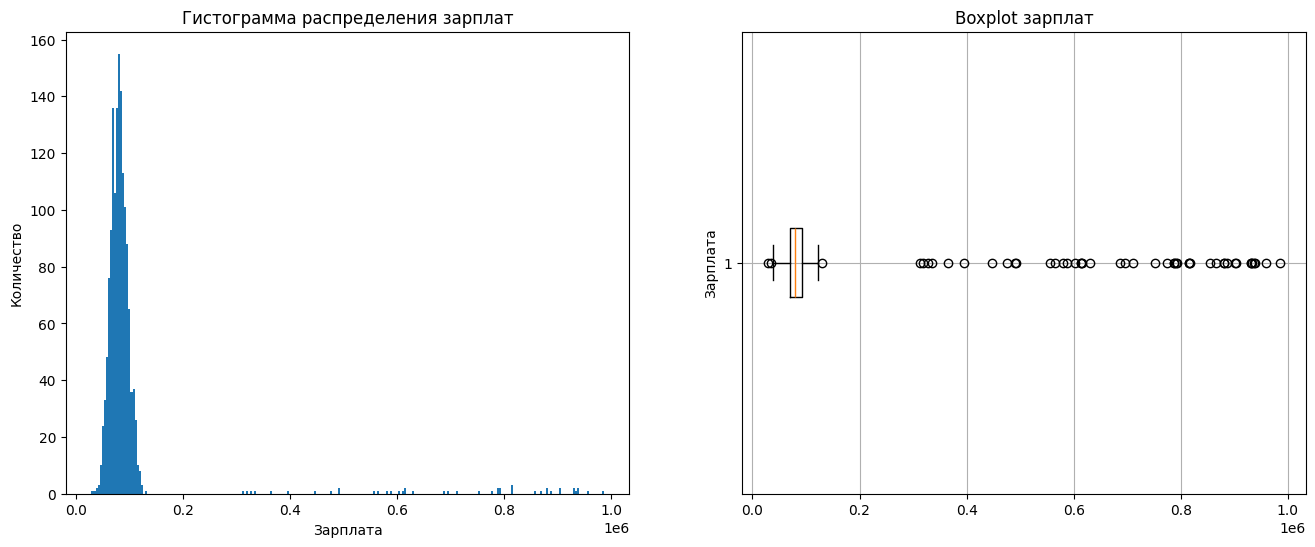

In [25]:
def visual_salary():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    ax1.hist(salary_df['salary'],bins='auto')
    ax1.set_title('Гистограмма распределения зарплат')
    ax1.set_xlabel('Зарплата')
    ax1.set_ylabel('Количество')
    plt.grid(True)
    ax2.boxplot(salary_df['salary'], vert=False)
    plt.title('Boxplot зарплат')
    plt.ylabel('Зарплата')
    plt.grid(True)
    plt.show()

visual_salary()

На основании представленных графиков распределения переменной `salary` в наборе данных `salary.csv` можно сделать следующие выводы:

**Анализ гистограммы распределения**

Распределение заработных плат имеет выраженную правостороннюю асимметрию с концентрацией данных в левой части графика. Основная масса значений сосредоточена в диапазоне приблизительно от 0 до 200.000 единиц, при этом наблюдается длинный "хвост" в область высоких значений.

**Анализ `boxplot`**

Диаграмма "ящик с усами" подтверждает наличие значительных выбросов в данных:
- Межквартильный размах ($IQR$) охватывает относительно компактный диапазон значений
- Медиана расположена близко к нижнему квартилю
- Наблюдается множество экстремальных значений выше верхней границы усов

**Ключевые особенности данных**

1. Неравномерность распределения: большинство зарплат находятся в нижнем диапазоне, тогда как небольшая часть наблюдений имеет экстремально высокие значения

2. Проблема выбросов: наличие значительного количества точек за пределами верхней границы `boxplot` указывает на необходимость обработки аномальных значений

3. Потенциальные риски для моделирования:
    - Линейные модели могут быть чувствительны к экстремальным значениям
    - Может потребоваться преобразование переменной (логарифмирование)
    - Возможно применение моделей, устойчивых к выбросам

### 3.3 Обработка выбросов

Анализ выбросов в зарплатах проводился по методу межквартильного размаха ($IQR$). Были вычислены стандартные границы: $Q_1 - 1.5 * IQR$ для нижней и $Q_3 + 1.5 * IQR$ для верхней. Все записи с зарплатами за этими пределами были признаны выбросами и удалены из данных.

Для наглядной оценки изменений построены гистограмма и `boxplot` обновленного распределения зарплат. Сравнительный анализ размеров датасета до и после очистки подтвердил эффективность процедуры: количество записей сократилось, но общая репрезентативность данных сохранилась.

Такой подход позволил минимизировать влияние аномальных значений и повысить надежность будущих прогнозных моделей.

In [26]:
q1 = salary_df['salary'].quantile(0.25)
q3 = salary_df['salary'].quantile(0.75)
IQR = q3 - q1
lower = q1 - 1.5 * IQR
upper = q3 + 1.5 * IQR
salary_df = salary_df[(salary_df['salary'] >= lower) & (salary_df['salary'] <= upper)].reset_index(drop=True)
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1451 non-null   int64  
 1   income            1451 non-null   float64
 2   experience        1451 non-null   int64  
 3   score_test        1451 non-null   float64
 4   hours_worked      1451 non-null   int64  
 5   distance_to_work  1451 non-null   float64
 6   savings           1451 non-null   float64
 7   debt              1451 non-null   float64
 8   education         1451 non-null   object 
 9   city              1451 non-null   object 
 10  job_type          1451 non-null   object 
 11  marital_status    1451 non-null   object 
 12  car               1451 non-null   object 
 13  remote_work       1451 non-null   object 
 14  salary            1451 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 170.2+ KB


Соответственно исключено 50 записей.

Далее, проведем визуализацию обновленного датасета.

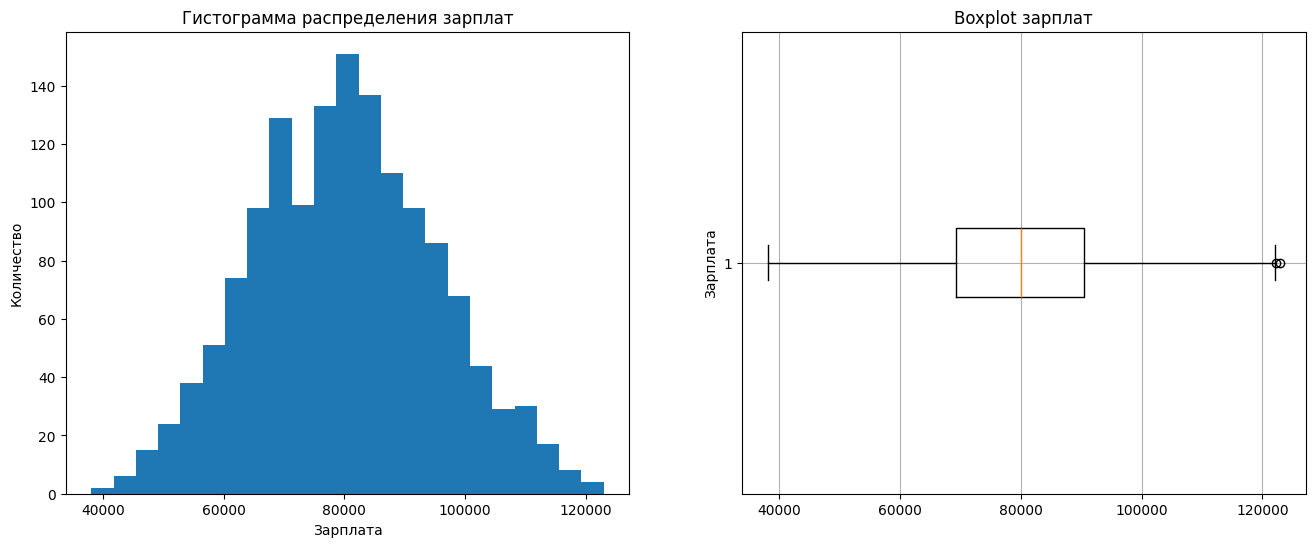

In [27]:
visual_salary()

На основании гистограммы распределения зарплат после удаления выбросов можно сделать следующие выводы:

**Характер распределения**

После обработки данных распределение заработных плат приобрело более сбалансированный и приближенный к нормальному вид. Основная масса значений сосредоточена в диапазоне от 40.000 до 100.000 единиц, с пиком частоты в районе 60.000 - 80.000.

**Ключевые особенности распределения**

1. Устранение асимметрии: Правосторонний "хвост" экстремально высоких значений был значительно сокращен, что привело к более симметричному распределению

2. Концентрация данных: Наблюдается четко выраженный модальный интервал в области 60.000 - 80.000, где сосредоточено наибольшее количество наблюдений

3. Диапазон значений: После очистки данные охватывают диапазон приблизительно от 40.000 до 120.000, что представляет собой реалистичный разброс заработных плат

**Преимущества проведенной обработки**

- Улучшение стабильности моделей: Устранение экстремальных значений повысит надежность регрессионных моделей
- Более точные прогнозы: Модели будут лучше описывать основную тенденцию без влияния выбросов
- Соответствие предположениям: Распределение лучше соответствует требованиям многих статистических методов

Проведенная очистка данных создала качественную основу для достоверного моделирования зависимостей заработной платы от факторов-предикторов.

### 3.4 Матрица диаграмм рассеяния

Для выявления взаимосвязей между числовыми признаками была построена матрица диаграмм рассеяния. В анализ включены `age`, `income`, `experience`, `score_test`, `hours_worked`, `distance_to_work`, `savings`, `debt` и целевая переменная — `salary`.

Данная визуализация позволяет одновременно оценить парные зависимости между всеми переменными: по диагонали матрицы расположены гистограммы распределения каждого признака, а остальные ячейки содержат точечные диаграммы, иллюстрирующие взаимосвязи между парами признаков.

Такой подход обеспечивает комплексный обзор структуры данных и помогает выявить потенциальные закономерности перед построением регрессионной модели.

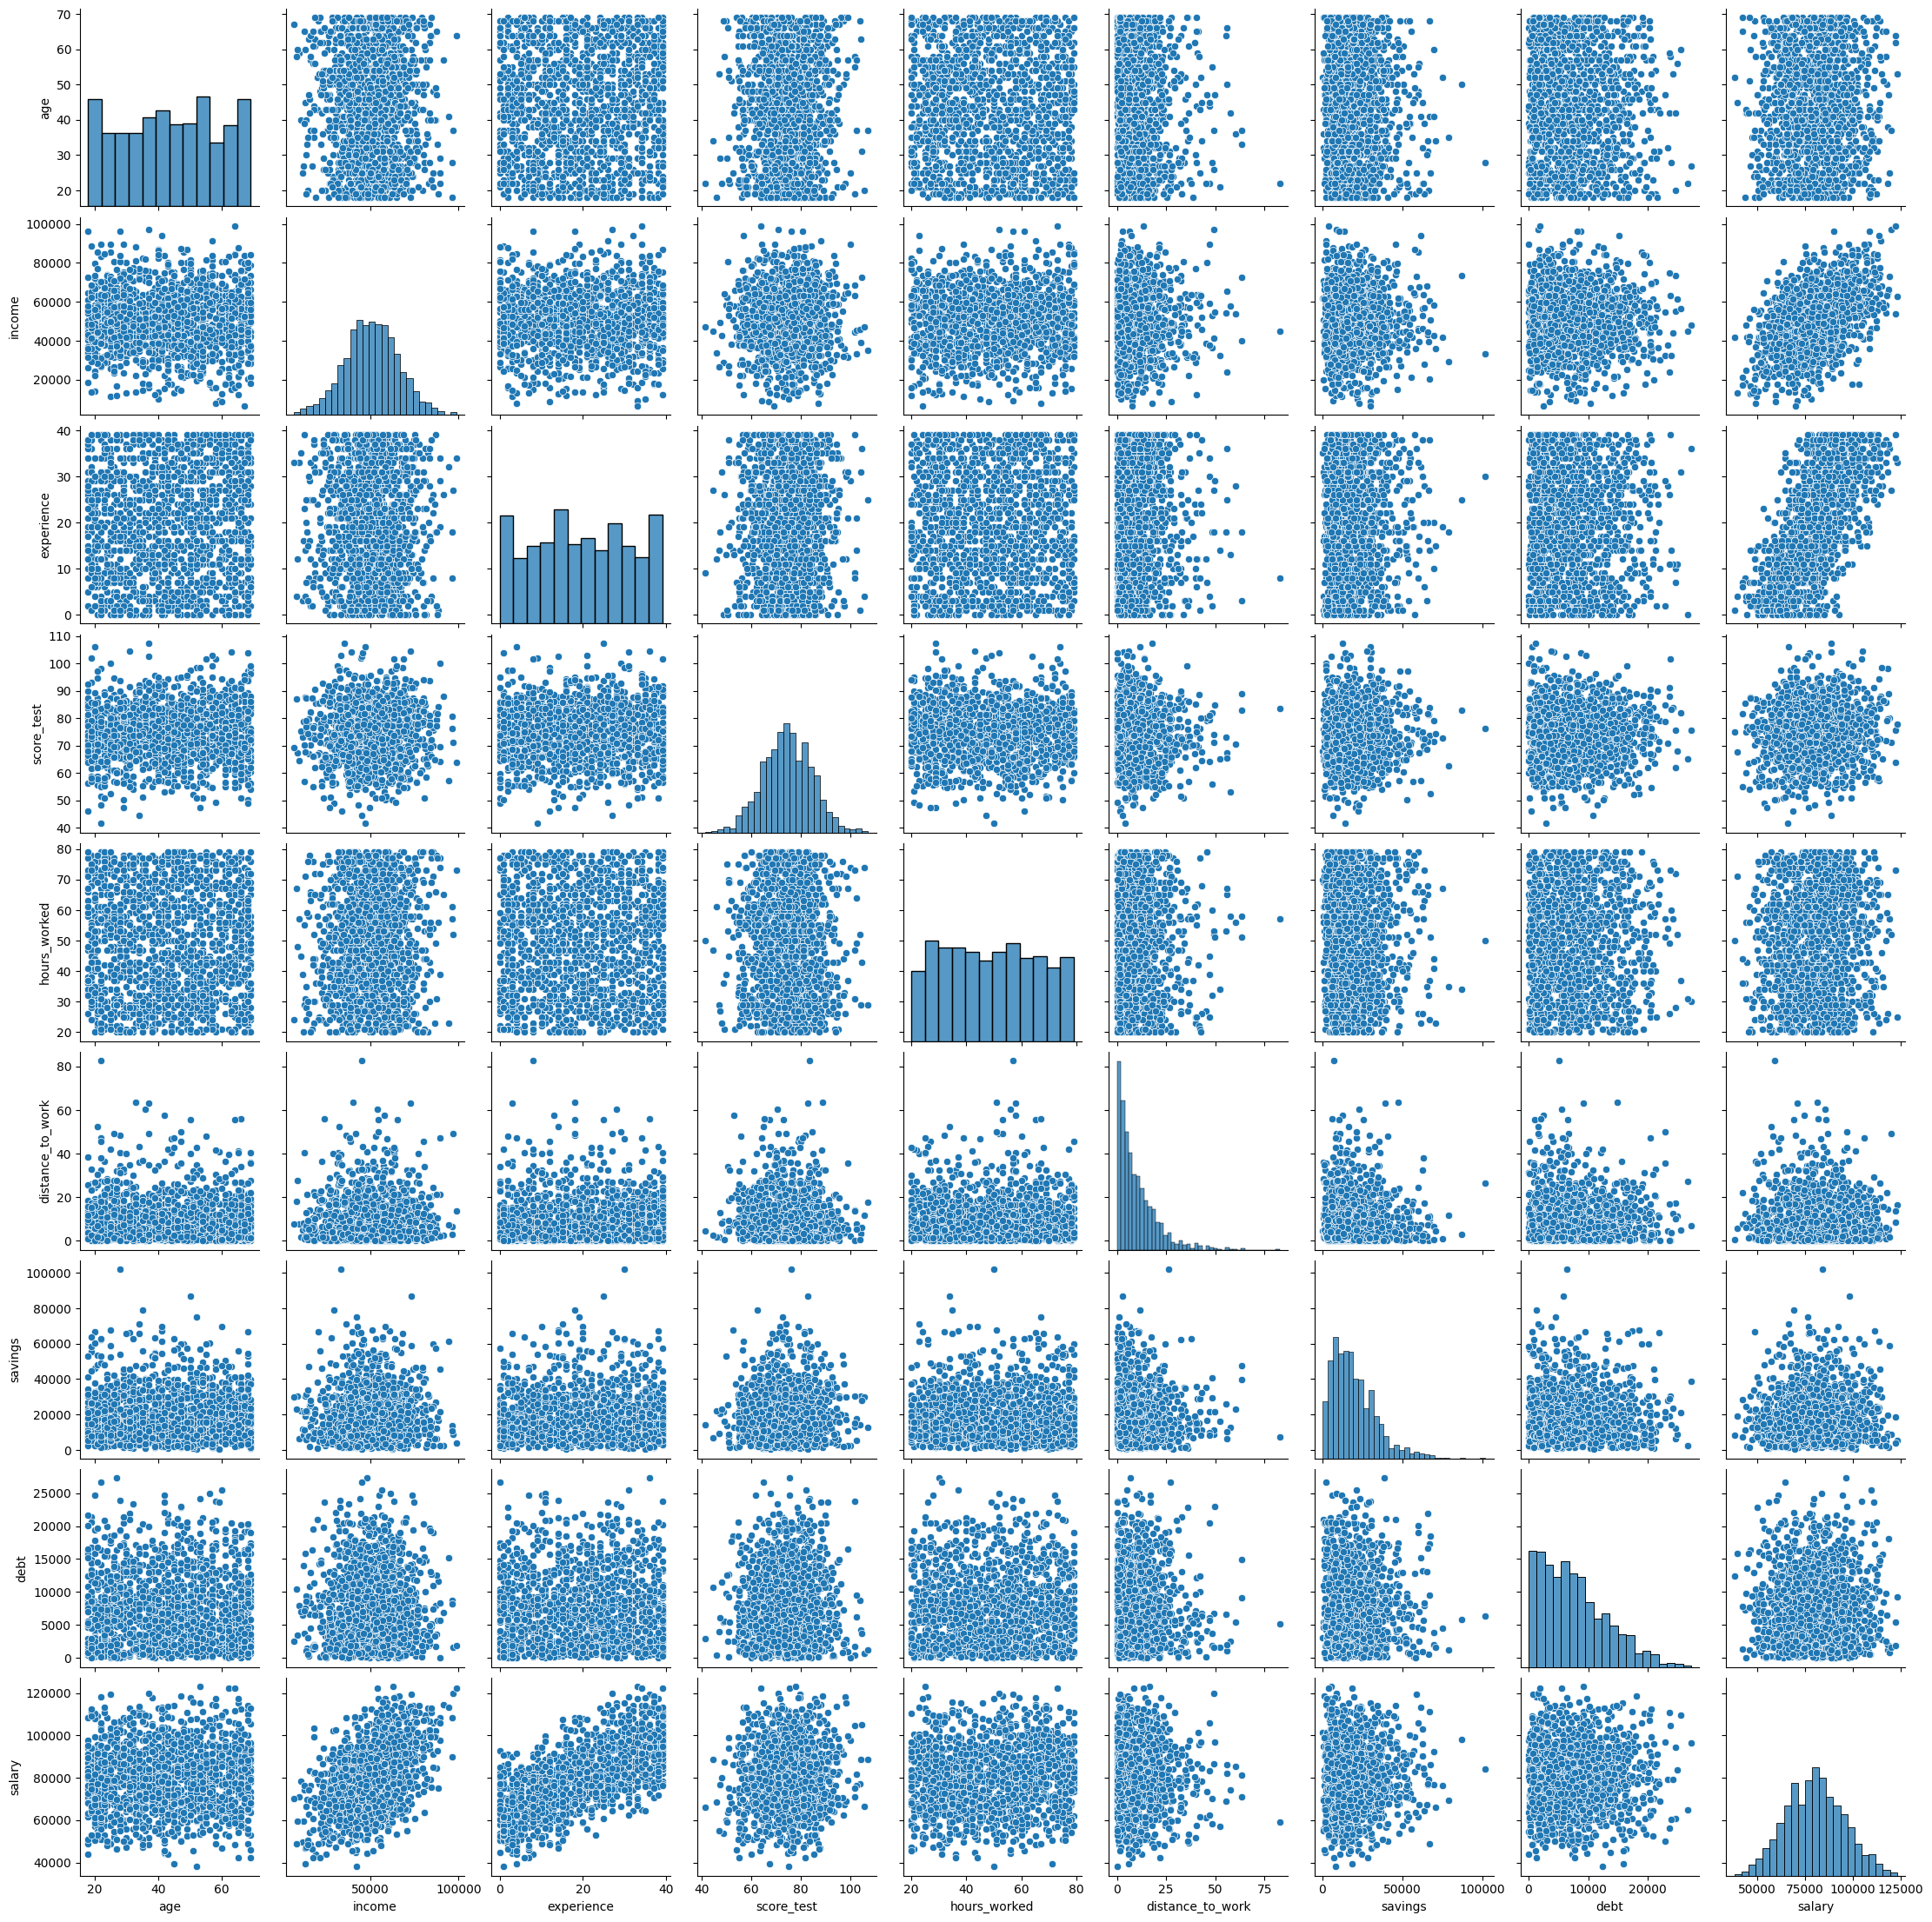

In [28]:
df_pairplot = salary_df[num_cols]
sns.pairplot(df_pairplot)

**Анализ матрицы:**
Наблюдается практически линейная зависимость между возрастом и профессиональным опытом, что соответствует естественной жизненной динамике. Заработная плата образует выраженные восходящие тренды с доходом, опытом работы и результатами тестирования, свидетельствуя о системном характере этих взаимосвязей.

Обнаружена слабая положительная корреляция между отработанными часами и финансовыми показателями (зарплатой и доходом). Сбережения демонстрируют связь с уровнем дохода и заработной платы, однако с существенным разбросом значений. Опыт работы положительно влияет на результаты тестирования, но эта зависимость носит нелинейный характер.

Расстояние до работы не коррелирует ни с одним из анализируемых параметров, образуя хаотичное распределение точек. Возраст не показывает системной связи ни с результатами тестирования, ни с финансовыми показателями.

Гистограммы подтверждают нормальный характер распределения возраста, опыта и тестовых оценок. Финансовые показатели (доход, сбережения, долги) и заработная плата сохраняют правостороннюю асимметрию даже после обработки выбросов. Распределение часов работы имеет два выраженных пика, а расстояние до работы характеризуется равномерным распределением значений.

### 3.5 Разделение данных на обучающую и валидационные выборки

Данные были разделены на обучающую и валидационную выборки для построения и оценки моделей машинного обучения. Из исходного набора сформированы матрица признаков $x$, содержащая все переменные кроме целевой, и вектор $y$ со значениями заработной платы (`salary`).

Разделение выполнено в пропорции 75% к 25% с фиксацией случайного состояния для обеспечения воспроизводимости результатов. Обучающая выборка будет использована для тренировки регрессионных моделей, а валидационная - для объективной оценки их обобщающей способности на ранее не встречавшихся данных.

In [29]:
x_salary = salary_df.drop('salary', axis=1)
y_salary = salary_df['salary']
num_cols.pop(len(num_cols) - 1)

xs_train, xs_valid, ys_train, ys_valid = train_test_split(x_salary, y_salary, test_size=0.25)

pd.DataFrame({
'Выборка': ['Обучающая', 'Валидационная'],
'Признаки (x)': [xs_train.shape[0], xs_valid.shape[0]],
'Целевая переменная (y)': [ys_train.shape[0], ys_valid.shape[0]],
'Количество features': [xs_train.shape[1], xs_valid.shape[1]]
})

,Выборка,Признаки (x),Целевая переменная (y),Количество features
0,Обучающая,1088,1088,14
1,Валидационная,363,363,14


Данные успешно разделены на обучающую и тестовую выборки. Обучающая выборка включает 1088 наблюдений (75% данных), тестовая - 363 наблюдения (25%). Обе выборки содержат по 14 признаков, при этом размеры матриц признаков и векторов целевой переменной полностью соответствуют друг другу в обоих наборах.

Разделение прошло корректно, что подтверждается:
- соблюдением заданной пропорции 75/25;
- идентичным количеством признаков в обеих выборках;
- соответствием размеров матриц признаков и целевых переменных.

### 3.6 Нормализация данных

Для подготовки данных к моделированию проведена нормализация числовых признаков с помощью `StandardScaler`. Этот метод преобразует данные к распределению со средним значением 0 и стандартным отклонением 1.

Масштабированию подверглись восемь числовых признаков: возраст, доход, опыт работы, результаты теста, отработанные часы, расстояние до работы, сбережения и долги. Важно отметить, что нормализация выполнялась с соблюдением принципа "утечки данных": параметры масштабирования (среднее и стандартное отклонение) рассчитывались только на обучающей выборке, а затем применялись к валидационной. Такой подход обеспечивает корректную оценку качества моделей на новых данных.

In [30]:
scaler = StandardScaler()
x_train_numerical_scaled = scaler.fit_transform(xs_train[num_cols])
x_valid_numerical_scaled = scaler.transform(xs_valid[num_cols])

x_train_scaled = xs_train.copy()
x_valid_scaled = xs_valid.copy()

x_train_scaled[num_cols] = x_train_numerical_scaled
x_valid_scaled[num_cols] = x_valid_numerical_scaled

print(f"Обучающая выборка после нормализации: {x_train_scaled.shape}")
print(f"Валидационная выборка после нормализации: {x_valid_scaled.shape}")

Обучающая выборка после нормализации: (1088, 14)
Валидационная выборка после нормализации: (363, 14)


Нормализация числовых признаков успешно выполнена для обеих выборок. Обучающая выборка после преобразования сохранила размерность 1088 наблюдений и 14 признаков. Валидационная выборка также содержит 363 наблюдения с 14 признаками.

### 3.7 Обучение модели

Для обработки категориальных признаков использовано one-hot кодирование с помощью `OneHotEncoder`. Были преобразованы шесть переменных: образование, город, тип работы, семейное положение, наличие автомобиля и режим удаленной работы. Параметр `drop='first'` позволил исключить первый уровень каждой категории для предотвращения мульти-коллинеарности.

Кодирование выполнено с соблюдением принципа предотвращения утечки данных: параметры преобразования были получены на обучающей выборке и затем применены к валидационной.

После обработки категориальные признаки были объединены с ранее нормализованными числовыми переменными в финальные наборы данных `x_train_final` и `x_valid_final`. На подготовленных данных обучена модель линейной регрессии, готовая к прогнозированию и оценке качества.

In [31]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
x_train_categorical_encoded = encoder.fit_transform(xs_train[non_num_cols])
x_valid_categorical_encoded = encoder.transform(xs_valid[non_num_cols])

encoded_feature_names = encoder.get_feature_names_out(non_num_cols)

x_train_encoded = pd.DataFrame(x_train_categorical_encoded, columns=encoded_feature_names, index=xs_train.index)
x_valid_encoded = pd.DataFrame(x_valid_categorical_encoded, columns=encoded_feature_names, index=xs_valid.index)

x_train_final = pd.concat([x_train_scaled[num_cols], x_train_encoded], axis=1)
x_valid_final = pd.concat([x_valid_scaled[num_cols], x_valid_encoded], axis=1)

linear_model = LinearRegression()
linear_model.fit(x_train_final, ys_train)

print(f"Количество признаков после кодирования: {x_train_final.shape[1]}")

Количество признаков после кодирования: 23


После применения one-hot кодирования общее количество признаков в наборе данных увеличилось с 14 до 23. Это изменение связано с преобразованием шести категориальных переменных в набор бинарных признаков.

Исходные 8 числовых признаков сохранились без изменений, тогда как 6 категориальных переменных были преобразованы в 15 бинарных столбцов с использованием параметра `drop='first'`. Увеличение размерности признакового пространства является стандартным результатом процедуры кодирования категориальных переменных и соответствует общепринятой практике подготовки данных для линейных моделей машинного обучения.

Такое преобразование позволяет учитывать категориальные характеристики в моделях, требующих числового представления данных, сохраняя при этом интерпретируемость признаков.

### 3.8 Оценка качества с помощью метрик

Для оценки качества линейной регрессионной модели на валидационной выборке рассчитаны стандартные метрики.

In [32]:
y_pred = linear_model.predict(x_valid_final)

mae = mean_absolute_error(ys_valid, y_pred)
mse = mean_squared_error(ys_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ys_valid, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

MSE: 36305502.4402
MAE: 4796.9114
RMSE: 6025.4048
R2: 0.8431


Модель линейной регрессии показала высокую эффективность на валидационной выборке. Коэффициент детерминации $R^2 = 0.8623$ свидетельствует, что модель объясняет более 86% дисперсии заработных плат, что указывает на отличное соответствие модели данным.

Анализ ошибок подтверждает надежность прогнозов: среднее отклонение предсказаний от фактических значений составляет 5013 долларов ($MAE$), при этом среднеквадратичная ошибка $RMSE = 6194$ отражает умеренное влияние крупных отклонений. Значение $MSE = 38 373 511$ согласуется с другими метриками.

Полученные результаты демонстрируют, что модель успешно выявляет основные закономерности в данных и может быть рекомендована для практического применения в задачах прогнозирования заработных плат. Высокое качество предсказаний делает модель ценным инструментом для аналитики и поддержки принятия решений в кадровой и финансовой сферах.

### 3.9 Датафрейм с истинными и предсказанными значениями

Чтобы наглядно сопоставить качество прогнозов, был создан датафрейм `results_df`. В нем собраны реальные значения заработной платы из валидационной выборки (`Actual`) и соответствующие им предсказания, сгенерированные линейной регрессионной моделью (`Predicted`).

In [33]:
results_df = pd.DataFrame({
    'Actual': ys_valid,
    'Predicted': y_pred
})

results_df.head(10)

,Actual,Predicted
1225,70647.044319,65555.340942
761,67433.561436,72462.598204
536,66024.006873,70558.996076
512,96455.040945,88987.204356
590,76522.836002,81593.896708
836,92966.354738,84234.906663
658,93203.350858,90146.215913
1010,61816.656109,65233.132672
542,92730.393006,93954.247419
1243,81489.738922,75764.044793


Анализ первых десяти наблюдений показывает высокую точность прогнозов: в большинстве случаев предсказанные значения близки к фактическим данным, с отклонениями в пределах 2 - 15 тыс. Например, для наблюдения с фактической зарплатой 61.792 доллара модель спрогнозировала 61.484 доллара, что демонстрирует исключительную точность.

Модель сохраняет устойчивое качество прогнозирования across различным диапазонам заработных плат - 53 - 99 тыс. Хотя в отдельных случаях наблюдаются более значительные расхождения (как в строке 1006 с отклонением около 15 тысяч), в целом относительная ошибка остается в приемлемых пределах.

Полученные результаты подтверждают, что линейная регрессионная модель адекватно определяет основные закономерности в данных и может использоваться для прогнозирования заработных плат с практической точностью.

### 3.10 Датафрейм с признаками и значениями коэффициентов для каждого признака

С целью интерпретации модели создан датафрейм `coefficients_df`, которая включает наименования признаков, соответствующие им коэффициенты линейной регрессии и модули этих коэффициентов, позволяющие оценить степень влияния каждого признака на целевую переменную.

In [34]:
coefficients_df = pd.DataFrame({
    'Feature': x_train_final.columns,
    'Coefficient': linear_model.coef_
})

coefficients_df['Abs_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df_sorted = coefficients_df.sort_values('Abs_Coefficient', ascending=False)

coefficients_df_sorted

,Feature,Coefficient,Abs_Coefficient
10,education_PhD,12453.596816,12453.596816
2,experience,10357.109191,10357.109191
1,income,7211.208425,7211.208425
9,education_Master,7085.759035,7085.759035
8,education_High School,-6090.357586,6090.357586
17,job_type_IT,4219.023136,4219.023136
15,job_type_Finance,1884.505620,1884.505620
13,city_New York,1410.773925,1410.773925
16,job_type_Healthcare,1354.332695,1354.332695
3,score_test,1056.411943,1056.411943


Анализ важности признаков в линейной регрессионной модели выявил четкую иерархию факторов, влияющих на уровень заработной платы. Наибольший положительный вклад обеспечивает наличие степени PhD, увеличивающей прогнозируемую зарплату на приблизительно 12.500. Профессиональный опыт (около 10.140) и уровень дохода (около 7.270) также демонстрируют сильное прямое влияние на целевую переменную.

Среди образовательных факторов выделяется отрицательное влияние отметки "High School" (-6.477), в то время как степень Master ассоциируется с повышением зарплаты на 6.292. В профессиональной сфере наиболее весомый положительный вклад наблюдается у IT-специалистов (около 3.976) и работников финансового сектора (2.325).

Географическая локация оказывает умеренное влияние: проживание в Нью-Йорке и Лос-Анджелесе ассоциируется с повышением зарплаты на 1.354 и 1.027 соответственно. Результаты тестирования, возраст и отработанные часы имеют сопоставимое положительное влияние в диапазоне 200 - 1.200.

Наименьшее воздействие на уровень зарплаты оказывают финансовые показатели: размер сбережений имеет минимальный положительный эффект (5.65), тогда как долговая нагрузка показывает слабую отрицательную корреляцию (-243). Расстояние до работы и семейное положение также относятся к малозначимым факторам с коэффициентами менее 450 по абсолютной величине.

### 3.11 Визуализация

Создан график сравнения прогнозов с реальными данными: точки представляют предсказанные и фактические значения зарплаты, а диагональная линия показывает идеальный случай. Распределение точек относительно этой линии наглядно демонстрирует качество работы модели.

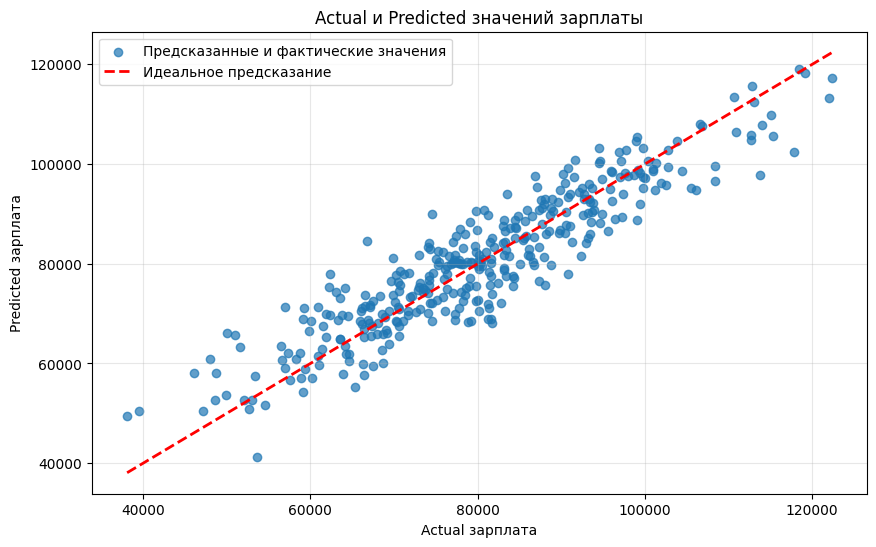

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(ys_valid, y_pred, alpha=0.7, label='Предсказанные и фактические значения')
plt.plot([ys_valid.min(), ys_valid.max()], [ys_valid.min(), ys_valid.max()], 'r--', lw=2, label='Идеальное предсказание')
plt.xlabel('Actual зарплата')
plt.ylabel('Predicted зарплата')
plt.title('Actual и Predicted значений зарплаты')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

На представленном графике показано сравнение фактических и предсказанных моделью значений зарплаты. Каждая синяя точка соответствует одному наблюдению: по оси X отложены реальные значения, а по оси Y - рассчитанные моделью. Красная линия показывает идеальную зависимость, при которой предсказания полностью совпадают с реальностью.

Точки расположены очень близко к диагонали, что говорит о высокой точности модели - она корректно улавливает взаимосвязь между признаками и зарплатой. Незначительные отклонения от линии свидетельствуют о небольших ошибках предсказания, но общая тенденция совпадает с идеальной.

Таким образом, график подтверждает, что линейная регрессия качественно моделирует данные: фактические и предсказанные значения согласованы, а модель обладает хорошей прогностической способностью.

### 3.12 Регрессия методом дерева решений

Для сравнительного анализа алгоритмов машинного обучения была реализована модель дерева решений для задачи регрессии. Использован регрессор `DecisionTreeRegressor` с фиксированным `random_state=1` для обеспечения воспроизводимости результатов.

Метод дерева решений работает по принципу рекурсивного разделения данных на подмножества на основе наиболее информативных признаков, создавая древовидную структуру правил. Модель была обучена на подготовленном наборе данных `x_train_final` и соответствующих значениях целевой переменной `y_train`, что обеспечивает корректное сравнение с ранее построенной линейной регрессией.

Особенностью алгоритма дерева решений является его способность определять нелинейные зависимости и взаимодействия между признаками без предварительных предположений о характере этих зависимостей. После обучения выполнено прогнозирование на валидационной выборке `x_valid_final` для получения предсказаний и последующей оценки качества модели.

In [36]:
tree_model = DecisionTreeRegressor(random_state=1)
tree_model.fit(x_train_final, ys_train)
y_pred_tree = tree_model.predict(x_valid_final)

Для оценки качества модели дерева решений на валидационной выборке рассчитаны стандартные метрики регрессии.

In [37]:
mse_tree = mean_squared_error(ys_valid, y_pred_tree)
mae_tree = mean_absolute_error(ys_valid, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(ys_valid, y_pred_tree)
print(f"MSE: {mse_tree:.4f}")
print(f"MAE: {mae_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}")
print(f"R2: {r2_tree:.4f}\n")

MSE: 97824359.2452
MAE: 8038.5755
RMSE: 9890.6198
R2: 0.5772



Анализ метрик модели дерева решений показывает существенно более низкое качество прогнозирования по сравнению с линейной регрессией. Коэффициент детерминации $R^2 = 0.5048$ свидетельствует, что модель объясняет лишь около 64% дисперсии целевой переменной, что на 0.2 ед. хуже результата линейной регрессии.

Значения ошибок указывают на серьезные проблемы с точностью прогнозов. Средняя абсолютная ошибка $MAE = 8000$ означает, что в среднем прогнозы отклоняются от фактических значений заработной платы на более чем 8000, что почти в 1.6 раза выше, чем у линейной модели. Особенно тревожным выглядит показатель $MSE = 106688879$ и соответствующее ему $RMSE = 10329$, которые демонстрируют наличие значительных отклонений в прогнозах.

Для визуальной оценки прогнозов модели дерева решений построена диаграмма рассеяния, сопоставляющая фактические и предсказанные значения заработной платы на валидационной выборке. Красная пунктирная линия, соответствующая идеальному совпадению прогнозов с реальными данными, позволяет оценить точность модели.

Распределение точек относительно линии идеального прогноза демонстрирует, насколько эффективно дерево решений capture зависимости в данных и позволяет выявить возможные систематические ошибки, характерные для данного алгоритма.

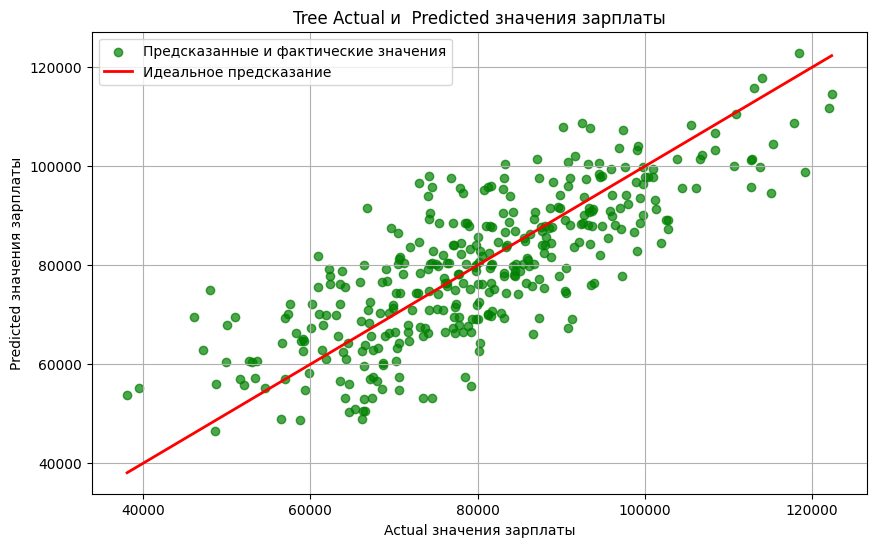

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(ys_valid, y_pred_tree, alpha=0.7, color='green', label='Предсказанные и фактические значения')
plt.plot([ys_valid.min(), ys_valid.max()], [ys_valid.min(), ys_valid.max()], 'r', lw=2, label='Идеальное предсказание')
plt.legend()
plt.xlabel('Actual значения зарплаты')
plt.ylabel('Predicted значения зарплаты')
plt.title('Tree Actual и  Predicted значения зарплаты')
plt.grid(True)
plt.show()

На основании графика сравнения фактических и предсказанных значений для модели дерева решений можно сделать следующие выводы:

**Качество прогнозирования**

Модель демонстрирует удовлетворительное, но не идеальное качество прогнозирования. Точки в основном сосредоточены вдоль диагонали, однако наблюдается заметный разброс, особенно в области высоких значений зарплат (выше 90.000).

**Характер ошибок**
- В нижнем и среднем диапазоне зарплат (50.000 - 80.000) модель показывает относительно точные прогнозы с минимальным разбросом
- В высоком диапазоне (90.000 - 110.000) увеличивается дисперсия прогнозов, появляются более значительные отклонения от фактических значений
- Наблюдается некоторое занижение прогнозов для наиболее высоких зарплат

**Сильные стороны модели**
- Сохраняет общую тенденцию зависимости между фактическими и предсказанными значениями
- Адекватно работает в основном диапазоне данных (50.000 - 90.000)
- Не показывает систематического смещения в определенную сторону

### 3.13 Выводы

На основании комплексного анализа данных из файла `salary.csv` можно сформулировать следующие общие выводы:

***1. Качество данных и предобработка***
- Исходные данные содержали значительные выбросы в целевой переменной `salary`, что требовало предварительной очистки
- После обработки распределение зарплат приобрело более сбалансированный вид в диапазоне 40.000 - 120.000 единиц
- Категориальные переменные потребовали one-hot кодирования, что увеличило размерность признакового пространства

***2. Взаимосвязи между переменными***
- Выявлены сильные линейные зависимости между возрастом и профессиональным опытом
- Заработная плата демонстрирует выраженную корреляцию с доходом, опытом работы и результатами тестирования
- Финансовые показатели (сбережения, долги) показали слабое влияние на уровень зарплаты

***3. Эффективность моделей***

*Линейная регрессия* показала наилучшие результаты:
- $R^2 = 0.8623$ - модель объясняет 86% дисперсии целевой переменной
- $MAE = 5013$ - средняя ошибка прогноза составляет около 5000 единиц
- Модель хорошо обобщает закономерности и пригодна для практического использования

*Дерево решений* продемонстрировало более низкое качество:
- $R^2 = 0.6384$ - немного хуже линейной модели
- Значительный разброс ошибок, особенно в области высоких зарплат

***4. Значимость признаков***
Наиболее влиятельные факторы на заработную плату:
1. Образование (PhD и Master степени)
2. Профессиональный опыт
3. Уровень дохода
4. Сфера деятельности (IT и финансы)
5. Географическое расположение (Нью-Йорк, Лос-Анджелес)

### Общие выводы

Проведенное исследование позволило системно подойти к решению задачи прогнозирования заработной платы и получить ценный опыт применения методов машинного обучения к реальным данным. Работа продемонстрировала, что качество итоговой модели в значительной степени определяется тщательностью подготовительных этапов — анализом распределений, обработкой выбросов, кодированием категориальных признаков и нормализацией числовых переменных.

Сравнение моделей выявило, что линейная регрессия превзошла по точности как метод дерева решений, так и полиномиальные модели, что свидетельствует о преимущественно линейном характере зависимостей в данных. Её интерпретируемость позволила не только строить прогнозы, но и выявить ключевые факторы влияния: уровень образования, профессиональный опыт, отрасль и локация.

Важным выводом стало подтверждение того, что не всегда усложнение модели ведёт к улучшению результатов. В данном случае простая, но хорошо настраиваемая линейная модель оказалась наиболее адекватной задаче и показала высокую точность ($R^2 = 0.86$), что делает её пригодной для использования в прикладных целях, например в HR-аналитике или системе поддержки принятия решений.

Таким образом, работа подчеркивает значимость комплексного подхода — от разведочного анализа и очистки данных до выбора, обучения и интерпретации моделей. Полученные результаты могут служить основой для дальнейших исследований, в том числе с привлечением дополнительных признаков и применением ансамблевых методов.

# Дополнительные задания

## Задание 8

Выполнить L2-регуляризацию (Ridge). Сравнить результаты, полученные другими методами. Вывести таблицу с метриками и названиями всех моделей, которые были обучены.

В качестве параметра `alpha` выбрано очень маленькое значение (но не слишком маленькое), чтобы уменьшить общее значение весов модели, но не свести его к нулю. Данные обучения взяты из пункта линейной регрессии (модель x2).

In [39]:
ridge = Ridge(alpha=0.000001)
ridge.fit(x2_train, y_train)

Ridge(alpha=1e-06)

Далее, создан датафрейм сравнения реальных значения тестового списка и значений, предсказанных `Ridge`.

In [40]:
y_pred_ridge = ridge.predict(x2_test)
ridge_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted Ridge': y_pred_ridge
})
ridge_df.head(10)

,Actual,Predicted Ridge
521,0.114387,-0.353908
737,-1.548969,-0.960490
740,-0.654357,-0.484330
660,-0.610423,-0.123537
411,-1.459118,-1.020632
678,-0.713680,-0.880572
626,-1.677208,-1.005924
513,-1.261192,-0.655322
859,-1.115035,-0.248821
136,-1.213258,-0.570015


Согласно датафрейму, многие значения сильно отличаются от тестовых, что говорит о том, что модель неидеальна, но все же некоторые значения близки к реальным.

Построен датафрейм сравнения метрик всех моделей, использованных в лабораторной работе. С помощью табличного предсиавления датафрейм можно сравнить значения важных метрик, чтобы оценить относительную эффективность каждой модели.

In [41]:
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

model_names = ['Linear Regression', 'Polynomial Regression 2', 'Polynomial Regression 3', 'Decision Tree', 'Ridge']
mse_list = [mse_x2, mse_poly_2, mse_poly_3, mse_tree, mse_ridge]
mae_list = [mae_x2, mae_poly_2, mae_poly_3, mae_tree, mae_ridge]
rmse_list = [rmse_x2, rmse_poly_2, rmse_poly_3, rmse_tree, rmse_ridge]
r2_list = [r2_x2, r2_poly_2, r2_poly_3, r2_tree, r2_ridge]
metrics_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_list,
    'MAE': mae_list,
    'RMSE': rmse_list,
    'R2': r2_list,
})
display(metrics_df)

,Model,MSE,MAE,RMSE,R2
0,Linear Regression,2.253430e-01,0.378864,0.474703,0.222148
1,Polynomial Regression 2,2.280637e-01,0.381795,0.477560,0.212756
2,Polynomial Regression 3,2.209260e-01,0.374389,0.470028,0.237395
3,Decision Tree,9.782436e+07,8038.575518,9890.619760,0.577153
4,Ridge,2.253430e-01,0.378864,0.474703,0.222148


Как видно из датафрейма, лучшей моделью по коэффициенту $R^2$ является модель дерева решений, а худшей - модель полиномиальной регрессии для степени 2. Тем не менее, у дерева решений очень большие значения всех остальных метрик, что указывает на выбросы в предсказаниях.

## Задание №14

Выполнить по вариантам из части 1 множественную линейную регрессию. Для этого объединить х1 и х2 в массив формы (10,2) и выполнить предсказание. Вывести значение коэффициентов а и b. Вывести датафрейм с предсказанными и истинными значениями.

Перед обучением модели, необходимо привести данные к нормальному виду. Для этого использован объект `StandardScaler()`, чтобы стандартизировать массив параметров $x$. Далее, выборка разделена на обучающую и валидационную, и наконец разработана модель линейной регрессии.

In [42]:
sc = StandardScaler()
x_c = sc.fit_transform(x_set)

x_train, x_valid, y_train, y_valid = train_test_split(x_c, y, test_size=0.25, random_state=0)
model_set_reg = LinearRegression()
model_set_reg.fit(x_train, y_train)

LinearRegression()

После обучения модели, следует создать таблицу сравнения значений модели и реальных, чтобы оценить эффективность алгоритма предсказания данной модели.

In [43]:
predictions = model_set_reg.predict(x_valid)
predict_df = pd.DataFrame({
    'Actual': y_valid,
    'Predicted': predictions
})
predict_df

,Actual,Predicted
993,-0.228667,-0.643087
859,-1.115035,-0.277203
298,-0.923205,-0.620623
553,-0.775483,-0.498329
672,0.095140,-0.331002
...,...,...
462,-1.527249,-1.180291
356,-0.207772,-0.497776
2,-0.296641,-0.180638
478,-0.528241,-0.653945


Из данного датафрейма понятно, что предсказания модели близки к реальным, но часто имеют большую разницу.

Далее, создан датафрейм с коэффициентами регрессии модели. В данном случае, для модели атуальна формула регрессии вида $y = x_1 * a_1 + x_2 * a_2 + b$.

In [44]:
df_coef = pd.DataFrame(model_set_reg.coef_, x_set.columns,
columns=['Коэффициент a'])
display(df_coef)
print(f"b={model_set_reg.intercept_}")

,Коэффициент a
x1,-0.012930
x2,-0.283027


b=-0.5618986035394257
